In [268]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/case-study-probability-of-default/Case Study-Probability of Default.pdf
/kaggle/input/case-study-probability-of-default/Case Study- Probability of Default.csv


In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [270]:
df = pd.read_csv('/kaggle/input/case-study-probability-of-default/Case Study- Probability of Default.csv')

In [271]:
df.head()

,PaymentMissFlag,AverageUtilization,Age,NumberOfUpto90DaysLate,RevolvingRatio,MonthlyIncome,NumberOfOpenCreditLines,NumberOfWaiverRequested,NumberSecuredLoansOrLines,NumberOfCreditEnquiry,NumberOfDependents,status
0,1,0.7661,45,2,0.8030,9120.0,13,0,6,0,2.0,RICH
1,0,0.9572,40,0,0.1219,2600.0,4,0,0,0,1.0,POOR
2,0,0.6582,38,1,0.0851,3042.0,2,1,0,0,0.0,MIDDLE
3,0,0.2338,30,0,0.0360,3300.0,5,0,0,0,0.0,LOWMIDDLE
4,0,0.9072,49,1,0.0249,63588.0,7,0,1,0,0.0,VERYRICH


In [272]:
df.columns

Index(['PaymentMissFlag', 'AverageUtilization', 'Age',
       'NumberOfUpto90DaysLate', 'RevolvingRatio ', 'MonthlyIncome ',
       'NumberOfOpenCreditLines ', 'NumberOfWaiverRequested ',
       'NumberSecuredLoansOrLines ', 'NumberOfCreditEnquiry ',
       'NumberOfDependents', 'status'],
      dtype='object')

In [273]:
df.shape

(150000, 12)

In [274]:
df['RevolvingRatio'] = df['RevolvingRatio ']
df['MonthlyIncome'] = df['MonthlyIncome ']
df['NumberOfOpenCreditLines'] = df['NumberOfOpenCreditLines ']
df['NumberOfWaiverRequested'] = df['NumberOfWaiverRequested ']
df['NumberSecuredLoansOrLines'] = df['NumberSecuredLoansOrLines ']
df['NumberOfCreditEnquiry'] = df['NumberOfCreditEnquiry ']
# df.drop('column_name', axis=1, inplace=True)
df.drop('RevolvingRatio ', axis=1, inplace=True)
df.drop('MonthlyIncome ', axis=1, inplace=True)
df.drop('NumberOfOpenCreditLines ', axis=1, inplace=True)
df.drop('NumberOfWaiverRequested ', axis=1, inplace=True)
df.drop('NumberSecuredLoansOrLines ', axis=1, inplace=True)
df.drop('NumberOfCreditEnquiry ', axis=1, inplace=True)
  

In [275]:
df.isna().sum()

PaymentMissFlag                  0
AverageUtilization               0
Age                              0
NumberOfUpto90DaysLate           0
NumberOfDependents            3924
status                          82
RevolvingRatio                   0
MonthlyIncome                29731
NumberOfOpenCreditLines          0
NumberOfWaiverRequested          0
NumberSecuredLoansOrLines        0
NumberOfCreditEnquiry            0
dtype: int64

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PaymentMissFlag            150000 non-null  int64  
 1   AverageUtilization         150000 non-null  float64
 2   Age                        150000 non-null  int64  
 3   NumberOfUpto90DaysLate     150000 non-null  int64  
 4   NumberOfDependents         146076 non-null  float64
 5   status                     149918 non-null  object 
 6   RevolvingRatio             150000 non-null  float64
 7   MonthlyIncome              120269 non-null  float64
 8   NumberOfOpenCreditLines    150000 non-null  int64  
 9   NumberOfWaiverRequested    150000 non-null  int64  
 10  NumberSecuredLoansOrLines  150000 non-null  int64  
 11  NumberOfCreditEnquiry      150000 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 13.7+ MB


In [277]:
# Checking the number of unique values across each columns
df.nunique()

PaymentMissFlag                  2
AverageUtilization           11985
Age                             86
NumberOfUpto90DaysLate          16
NumberOfDependents              13
status                           7
RevolvingRatio               19868
MonthlyIncome                13594
NumberOfOpenCreditLines         58
NumberOfWaiverRequested         19
NumberSecuredLoansOrLines       28
NumberOfCreditEnquiry           13
dtype: int64

In [278]:
# Inspect the status column 
df['status'].unique()

array(['RICH', 'POOR', 'MIDDLE', 'LOWMIDDLE', 'VERYRICH', nan,
       'VERYMIDDLE', 'VERYPOOR'], dtype=object)

Text(0.5, 1.0, 'status')

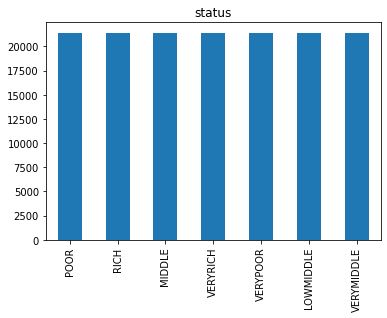

In [279]:
# Make a bar plot with the number of each unique status
fig = df['status'].value_counts().plot.bar()
fig.set_title('status')


Data is almost equally distributed 

Text(0.5, 1.0, 'NumberOfDependents')

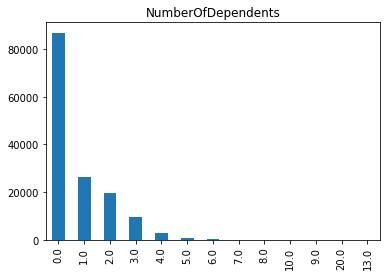

In [280]:
fig = df['NumberOfDependents'].value_counts().plot.bar()
fig.set_title('NumberOfDependents')

Text(0.5, 1.0, 'NumberOfUpto90DaysLate')

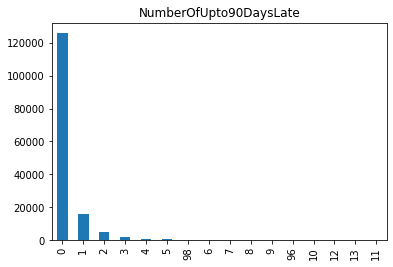

In [281]:
fig = df['NumberOfUpto90DaysLate'].value_counts().plot.bar()
fig.set_title('NumberOfUpto90DaysLate')

Text(0.5, 1.0, 'NumberOfOpenCreditLines')

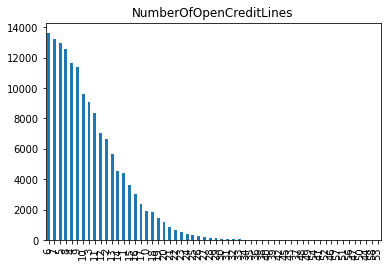

In [282]:
fig = df['NumberOfOpenCreditLines'].value_counts().plot.bar()
fig.set_title('NumberOfOpenCreditLines')

Text(0.5, 1.0, 'NumberOfWaiverRequested')

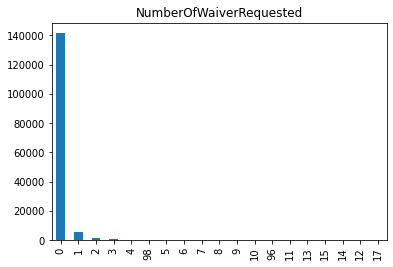

In [283]:
fig = df['NumberOfWaiverRequested'].value_counts().plot.bar()
fig.set_title('NumberOfWaiverRequested')

Text(0.5, 1.0, 'NumberSecuredLoansOrLines')

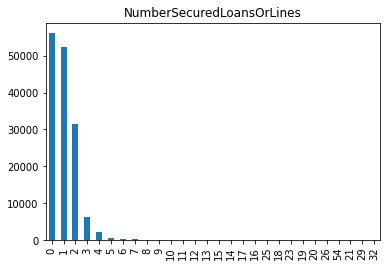

In [284]:
fig = df['NumberSecuredLoansOrLines'].value_counts().plot.bar()
fig.set_title('NumberSecuredLoansOrLines')

Text(0.5, 1.0, 'NumberOfCreditEnquiry')

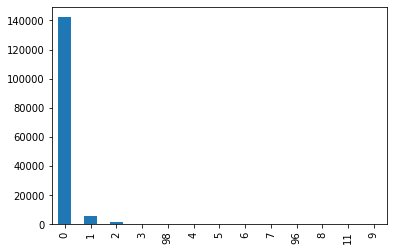

In [285]:
figadd_suffix = df['NumberOfCreditEnquiry'].value_counts().plot.bar()
fig.set_title('NumberOfCreditEnquiry')

In [286]:
df.columns

Index(['PaymentMissFlag', 'AverageUtilization', 'Age',
       'NumberOfUpto90DaysLate', 'NumberOfDependents', 'status',
       'RevolvingRatio', 'MonthlyIncome', 'NumberOfOpenCreditLines',
       'NumberOfWaiverRequested', 'NumberSecuredLoansOrLines',
       'NumberOfCreditEnquiry'],
      dtype='object')

In [287]:
df.loc[:,['NumberOfUpto90DaysLate','NumberOfDependents','NumberOfOpenCreditLines','NumberOfWaiverRequested','NumberSecuredLoansOrLines','NumberOfCreditEnquiry']].describe()

,NumberOfUpto90DaysLate,NumberOfDependents,NumberOfOpenCreditLines,NumberOfWaiverRequested,NumberSecuredLoansOrLines,NumberOfCreditEnquiry
count,150000.000000,146076.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.421033,0.757222,8.452760,0.265973,1.018240,0.240387
std,4.192781,1.115086,5.145951,4.169304,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,11.000000,0.000000,2.000000,0.000000
max,98.000000,20.000000,58.000000,98.000000,54.000000,98.000000


In [288]:
df.loc[:,['NumberOfUpto90DaysLate','NumberOfDependents','NumberOfOpenCreditLines','NumberOfWaiverRequested','NumberSecuredLoansOrLines','NumberOfCreditEnquiry']].skew()

NumberOfUpto90DaysLate       22.597108
NumberOfDependents            1.588242
NumberOfOpenCreditLines       1.215314
NumberOfWaiverRequested      23.087345
NumberSecuredLoansOrLines     3.482484
NumberOfCreditEnquiry        23.331743
dtype: float64

In [289]:
df.loc[:,['NumberOfUpto90DaysLate','NumberOfDependents','NumberOfOpenCreditLines','NumberOfWaiverRequested','NumberSecuredLoansOrLines','NumberOfCreditEnquiry']].kurt()

NumberOfUpto90DaysLate       522.376545
NumberOfDependents             3.001657
NumberOfOpenCreditLines        3.091067
NumberOfWaiverRequested      537.738945
NumberSecuredLoansOrLines     60.476808
NumberOfCreditEnquiry        545.682744
dtype: float64

In [290]:
df['NumberOfUpto90DaysLate'].quantile(np.arange(0,1.1,0.1))

0.0     0.0
0.1     0.0
0.2     0.0
0.3     0.0
0.4     0.0
0.5     0.0
0.6     0.0
0.7     0.0
0.8     0.0
0.9     1.0
1.0    98.0
Name: NumberOfUpto90DaysLate, dtype: float64

In [292]:
df.describe()

,PaymentMissFlag,AverageUtilization,Age,NumberOfUpto90DaysLate,NumberOfDependents,RevolvingRatio,MonthlyIncome,NumberOfOpenCreditLines,NumberOfWaiverRequested,NumberSecuredLoansOrLines,NumberOfCreditEnquiry
count,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,0.757222,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387
std,0.249746,249.755371,14.771866,4.192781,1.115086,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029900,41.000000,0.000000,0.000000,0.175100,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154200,52.000000,0.000000,0.000000,0.366500,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.559025,63.000000,0.000000,1.000000,0.868300,8.249000e+03,11.000000,0.000000,2.000000,0.000000
max,1.000000,50708.000000,109.000000,98.000000,20.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000


Some features are highly correlated . I remove them . 

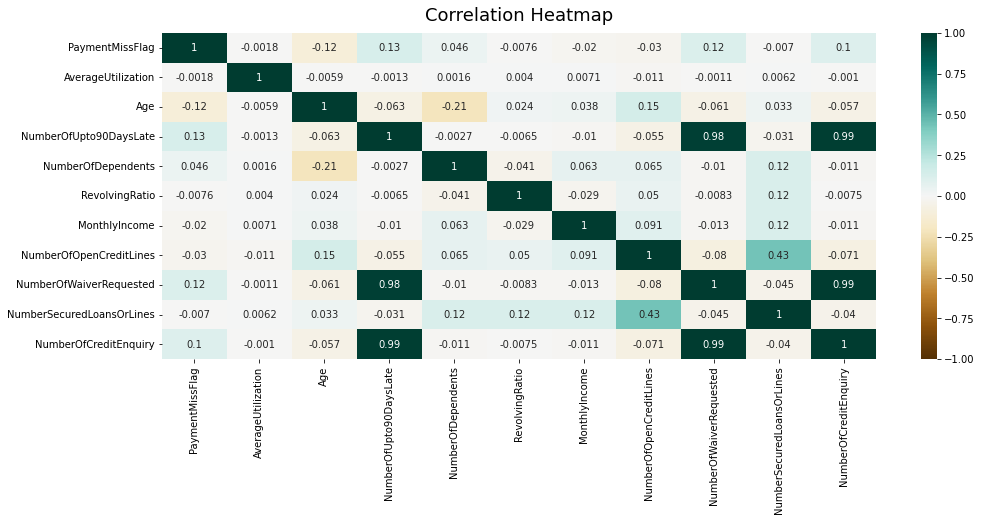

In [293]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [294]:
df.drop('NumberOfUpto90DaysLate', axis=1, inplace=True)
df.drop('NumberOfWaiverRequested', axis=1, inplace=True)


Many features are skewed because of outliers. So, I will detect them 

In [296]:
def find_skewed_boundaries(df, variable, distance):

    # Calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [298]:
Aveu_upper_limit, Aveu_lower_limit = find_skewed_boundaries(df,'AverageUtilization', 1.5)
Aveu_upper_limit, Aveu_lower_limit

(1.3527125000000002, -0.7637875000000001)

In [300]:
# Now let's replace the outliers by the maximum and minimum limit

df['AverageUtilization']= np.where(df['AverageUtilization'] > Aveu_upper_limit, Aveu_upper_limit,df['AverageUtilization'])

In [313]:
df.describe()

,PaymentMissFlag,AverageUtilization,Age,NumberOfDependents,RevolvingRatio,MonthlyIncome,NumberOfOpenCreditLines,NumberSecuredLoansOrLines,NumberOfCreditEnquiry
count,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000
mean,0.066840,0.322260,52.295207,0.675676,0.663274,6.670221e+03,8.452760,1.018240,0.240387
std,0.249746,0.356570,14.771866,0.910376,0.688114,1.438467e+04,5.145951,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.029900,41.000000,0.000000,0.175100,3.400000e+03,5.000000,0.000000,0.000000
50%,0.000000,0.154200,52.000000,0.000000,0.366500,5.400000e+03,8.000000,1.000000,0.000000
75%,0.000000,0.559025,63.000000,1.000000,0.868300,8.249000e+03,11.000000,2.000000,0.000000
max,1.000000,1.352713,109.000000,2.500000,1.908100,3.008750e+06,58.000000,54.000000,98.000000


In [309]:
NumD_upper_limit, NumD_lower_limit = find_skewed_boundaries(df,'NumberOfDependents', 1.5)
# Now let's replace the outliers by the maximum and minimum limit

df['NumberOfDependents']= np.where(df['NumberOfDependents'] > NumD_upper_limit, NumD_upper_limit,df['NumberOfDependents'])


In [311]:
Rev_upper_limit, Rev_lower_limit = find_skewed_boundaries(df,'RevolvingRatio', 1.5)
# Now let's replace the outliers by the maximum and minimum limit

df['RevolvingRatio']= np.where(df['RevolvingRatio'] > Rev_upper_limit, Rev_upper_limit,df['RevolvingRatio'])


In [ ]:
NumberOfOpenCreditLines	NumberSecuredLoansOrLines	NumberOfCreditEnquiry

In [314]:
Open_upper_limit, Open_lower_limit = find_skewed_boundaries(df,'NumberOfOpenCreditLines', 1.5)
# Now let's replace the outliers by the maximum and minimum limit

df['NumberOfOpenCreditLines']= np.where(df['NumberOfOpenCreditLines'] > Open_upper_limit, Open_upper_limit,df['NumberOfOpenCreditLines'])


In [315]:
Sec_upper_limit, Sec_lower_limit = find_skewed_boundaries(df,'NumberSecuredLoansOrLines', 1.5)
# Now let's replace the outliers by the maximum and minimum limit

df['NumberSecuredLoansOrLines']= np.where(df['NumberSecuredLoansOrLines'] > Sec_upper_limit, Sec_upper_limit,df['NumberSecuredLoansOrLines'])


In [316]:
Enq_upper_limit, Enq_lower_limit = find_skewed_boundaries(df,'NumberOfCreditEnquiry', 1.5)
# Now let's replace the outliers by the maximum and minimum limit

df['NumberOfCreditEnquiry']= np.where(df['NumberOfCreditEnquiry'] > Enq_upper_limit, Enq_upper_limit,df['NumberOfCreditEnquiry'])


In [321]:
df['NumberOfCreditEnquiry'].std()

0.0

In [322]:
# Now, NumberOfCreditEnquiry is 0 across the all rows.
# I remove this column. 
df.drop('NumberOfCreditEnquiry', axis=1, inplace=True)

In [325]:
# separate train and test sets
X = df.drop(labels=['PaymentMissFlag'], axis=1)
y = df['PaymentMissFlag']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=0)

X_train.shape, X_test.shape

((120000, 8), (30000, 8))

In [326]:
X_train.isna().sum() , X_test.isna().sum()

(AverageUtilization               0
 Age                              0
 NumberOfDependents            3184
 status                          64
 RevolvingRatio                   0
 MonthlyIncome                23727
 NumberOfOpenCreditLines          0
 NumberSecuredLoansOrLines        0
 dtype: int64,
 AverageUtilization              0
 Age                             0
 NumberOfDependents            740
 status                         18
 RevolvingRatio                  0
 MonthlyIncome                6004
 NumberOfOpenCreditLines         0
 NumberSecuredLoansOrLines       0
 dtype: int64)

In [ ]:
''' # Let's look at the different number of labels
# in each variable (cardinality).

# These are the categorical variables.
cols = ['NumberOfUpto90DaysLate','NumberOfDependents','NumberOfOpenCreditLines',
        'NumberOfWaiverRequested','NumberSecuredLoansOrLines','NumberOfCreditEnquiry']


total_data = len(X_train)

# For each categorical variable
for col in cols:

    # Count the number of houses per category
    # and divide by total houses.

    # That is, the percentage of houses per category.

    temp_df = pd.Series(X_train[col].value_counts() / total_data)

    # Make plot with these percentages.
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Add a line at 5 % to flag the threshold for rare categories.
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()
''''''

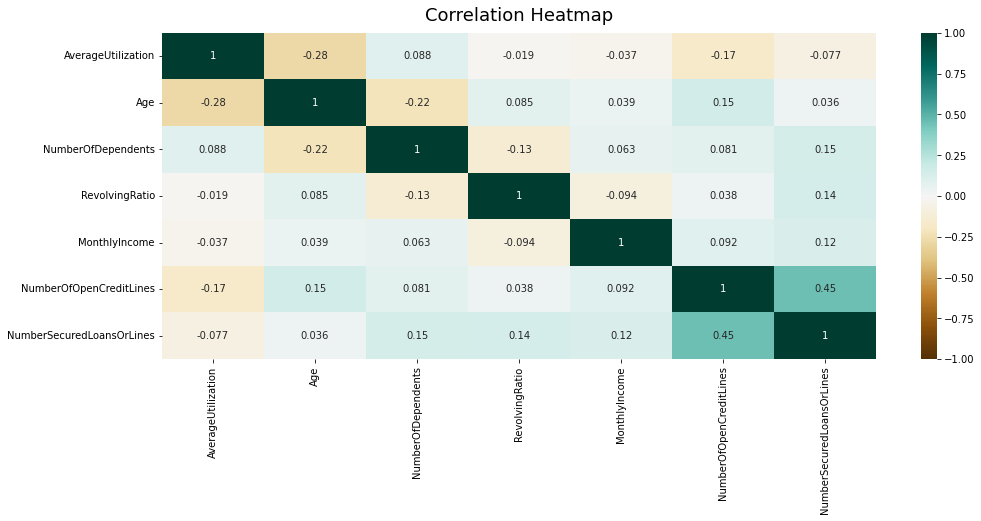

In [327]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Dealing with Missinfd Value 

In [328]:
X_train['status'].value_counts(normalize=True)

VERYRICH      0.143493
POOR          0.143218
VERYMIDDLE    0.143135
RICH          0.142993
LOWMIDDLE     0.142860
VERYPOOR      0.142167
MIDDLE        0.142134
Name: status, dtype: float64

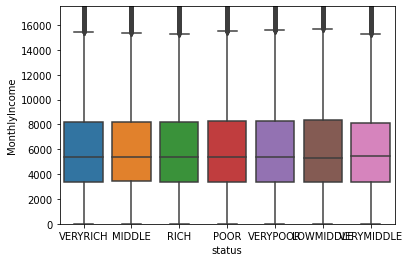

In [329]:
# Monthly income distribution for by status
sns.boxplot(x='status', y='MonthlyIncome', data=X_train)
plt.ylim(0,3008750.0)
plt.ylim(0,17500)
plt.show()

In [330]:
X_train.columns

Index(['AverageUtilization', 'Age', 'NumberOfDependents', 'status',
       'RevolvingRatio', 'MonthlyIncome', 'NumberOfOpenCreditLines',
       'NumberSecuredLoansOrLines'],
      dtype='object')

In [331]:
# % of missing data 
de_percentage = round(100 * X_train['NumberOfDependents'].isna().sum() / X_train.shape[0],2)

print( '% of data with NumberOfDependents being missing is {}%'.format(de_percentage) )

sta_percentage = round(100 * X_train['status'].isna().sum() / X_train.shape[0],2)

print( '% of data with status being missing is {}%'.format(sta_percentage) )

income_percentage = round(100 * X_train['MonthlyIncome'].isna().sum() / X_train.shape[0],2)

print( '% of data with MonthlyIncome being missing is {}%'.format(income_percentage) )

% of data with NumberOfDependents being missing is 2.65%
% of data with status being missing is 0.05%
% of data with MonthlyIncome being missing is 19.77%


In [334]:
# get th mode for missing data imputation 
X_train[['NumberOfDependents','status']].mode()

,NumberOfDependents,status
0,0.0,VERYRICH


In [335]:
# Capture the mode of the variables in
# a dictionary

imputation_dict = X_train[['NumberOfDependents','status']].mode().iloc[0].to_dict()

imputation_dict

{'NumberOfDependents': 0.0, 'status': 'VERYRICH'}

In [336]:
# Replace missing data

X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

In [338]:
# Impute MonthlyIncome column
Median = X_train['MonthlyIncome'].median()
# Use same value for test set to avoid overfitting. 
X_train['MonthlyIncome'].fillna(Median, inplace=True)
X_test['MonthlyIncome'].fillna(Median, inplace=True)

In [339]:
status_enc = pd.get_dummies(X_train['status'])
status_enc.head()

,LOWMIDDLE,MIDDLE,POOR,RICH,VERYMIDDLE,VERYPOOR,VERYRICH
77522,0,0,0,0,0,0,1
49457,0,1,0,0,0,0,0
114702,0,0,0,1,0,0,0
126322,0,0,0,1,0,0,0
69315,0,0,1,0,0,0,0


In [340]:
X_train = pd.concat([X_train, status_enc], axis=1)

In [341]:
X_train = X_train.drop('status', axis=1)
X_train

,AverageUtilization,Age,NumberOfDependents,RevolvingRatio,MonthlyIncome,NumberOfOpenCreditLines,NumberSecuredLoansOrLines,LOWMIDDLE,MIDDLE,POOR,RICH,VERYMIDDLE,VERYPOOR,VERYRICH
77522,0.0000,55,0.0,0.3266,6439.0,10.0,1.0,0,0,0,0,0,0,1
49457,0.0782,54,2.0,0.1411,4366.0,4.0,0.0,0,1,0,0,0,0,0
114702,0.0000,35,0.0,0.3666,6000.0,5.0,1.0,0,0,0,1,0,0,0
126322,1.0000,70,0.0,1.0000,5400.0,0.0,0.0,0,0,0,1,0,0,0
69315,0.3999,63,0.0,0.6086,10900.0,18.0,3.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119587,0.5467,84,0.0,0.5837,4625.0,7.0,4.0,0,0,0,0,1,0,0
89110,0.0000,71,0.0,0.4711,4900.0,12.0,1.0,0,0,0,1,0,0,0
93992,0.2186,51,0.0,1.9081,5400.0,11.0,2.0,1,0,0,0,0,0,0
20627,0.3885,54,2.0,0.4735,4500.0,8.0,1.0,0,0,0,0,0,1,0


In [342]:
status_enc_t = pd.get_dummies(X_test['status'])
X_test = pd.concat([X_test, status_enc_t], axis=1)
X_test = X_test.drop('status', axis=1)
X_test

,AverageUtilization,Age,NumberOfDependents,RevolvingRatio,MonthlyIncome,NumberOfOpenCreditLines,NumberSecuredLoansOrLines,LOWMIDDLE,MIDDLE,POOR,RICH,VERYMIDDLE,VERYPOOR,VERYRICH
124338,0.0315,59,0.0,0.0037,9900.0,3.0,0.0,0,0,0,0,0,0,1
32107,0.6172,58,0.0,0.0427,1450.0,8.0,0.0,0,0,0,0,0,1,0
91531,0.0848,29,0.0,0.1147,4200.0,4.0,0.0,0,0,0,0,1,0,0
10740,0.0000,46,2.0,1.9081,0.0,10.0,2.0,0,1,0,0,0,0,0
107657,0.4003,44,0.0,0.2683,9417.0,10.0,2.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52292,0.2965,30,0.0,0.4425,2600.0,5.0,1.0,0,1,0,0,0,0,0
7755,0.0000,67,0.0,0.5234,9727.0,14.0,3.0,0,0,0,0,1,0,0
53185,0.2647,60,1.0,0.2829,4000.0,16.0,0.0,0,0,0,0,1,0,0
119364,0.5464,59,0.0,0.3736,8000.0,13.0,2.0,0,0,0,1,0,0,0
